# Labyrinthe et dictionnaire

### Création d'un labyrinthe vierge et manipulation pure

***Création d'un labyrinthe***

In [18]:
def espace(m : int, n : int) :
    lab = {}
    for i in range(1, m + 1) : 
        for j in range(1, n + 1) : 
            voisins = set()
            if i - 1 > 0 : 
                voisins.add((i - 1, j))
            if i + 1 < m + 1 : 
                voisins.add((i + 1, j))
            if j - 1 > 0 :
                voisins.add((i, j - 1))
            if j + 1 < n +1 : 
                voisins.add((i, j + 1))
            lab[(i, j)] = voisins
    return lab

In [19]:
lab = espace(2, 2)
print(lab)

{(1, 1): {(1, 2), (2, 1)}, (1, 2): {(1, 1), (2, 2)}, (2, 1): {(1, 1), (2, 2)}, (2, 2): {(1, 2), (2, 1)}}


***Création d'un mur / Rupture entre deux cases voisines (à peaufiner)***

In [20]:
def cut(lab : dict, c1 : tuple, c2 : tuple) :
    lab[c1].remove(c2)
    lab[c2].remove(c1)

***Création d'un chemin / Liaison entre deux cases voisines (à peaufiner)***

In [21]:
def link(lab : dict, c1 : tuple, c2 : tuple) : 
    lab[c1].append(c2)
    lab[c2].append(c1)

### Relation et modification dans un labyrinthe

***Connexité***  
On part du principe qu'un labyrinthe est connexe si et seulement si, depuis n'importe quelle case du labyrinthe, il est possible d'aller sur toute les autres cases.  
Autrement dit, on peut accéder à toute les cases depuis une case fixé.

In [22]:
def conEx(coord, cases, lab) : 
    voisins = lab[coord]
    compte = 2
    for c in voisins :
        if c in cases :
            compte -= 1
            cases.remove(c)
    if compte != 2 and len(cases) == 0: 
        return True
    if len(cases) != 0 and compte == 2:
        return False
    r = False
    for c2 in voisins :
        r = r or conEx(c2, cases, lab)
    return r

In [23]:
def connexiTest(lab) :
    l = list(lab.keys())
    depart = l[0]
    dimx = l[len(l) -1][0]
    dimy = l[len(l) -1][1]
    cases = list(espace(dimx, dimy).keys())
    cases.remove(cases[0])
    return conEx(depart, cases, lab)

In [24]:
space = espace(4, 4)
cut(space, (1, 1), (1, 2))
cut(space, (1, 1), (2, 1))
print(connexiTest(space))
print(space)

False
{(1, 1): set(), (1, 2): {(1, 3), (2, 2)}, (1, 3): {(2, 3), (1, 2), (1, 4)}, (1, 4): {(2, 4), (1, 3)}, (2, 1): {(3, 1), (2, 2)}, (2, 2): {(2, 3), (3, 2), (1, 2), (2, 1)}, (2, 3): {(2, 4), (3, 3), (1, 3), (2, 2)}, (2, 4): {(2, 3), (3, 4), (1, 4)}, (3, 1): {(3, 2), (4, 1), (2, 1)}, (3, 2): {(3, 1), (3, 3), (4, 2), (2, 2)}, (3, 3): {(2, 3), (3, 2), (3, 4), (4, 3)}, (3, 4): {(4, 4), (2, 4), (3, 3)}, (4, 1): {(3, 1), (4, 2)}, (4, 2): {(3, 2), (4, 1), (4, 3)}, (4, 3): {(4, 4), (3, 3), (4, 2)}, (4, 4): {(3, 4), (4, 3)}}


In [25]:
space = espace(4, 4)
for i in range(1, 5) : 
    cut(space, (1, i), (2, i))
connexiTest(space)

False

### Dessin / Représentation graphique des labyrinthes

Version n° 1 :

In [26]:
def enceinte(x : int, y : int) :
    """dessine l'enceinte d'un labyrinthe de taille x*y"""

    if x <= 0 or y <= 0 :
        raise ValueError("Les dimensions de l'enceintes doivent être strictement positives !")
    
    liste_pos = [(0, 0), (x, 0), (x, y), (0, y), (0, 0)]
    plot = line2d(liste_pos, axes=False)
    for i in range(1, x) :
        plot += line2d([(i, 0), (i, y)], axes=False)
    for j in range(1, y) :
        plot += line2d([(0, j), (x, j)], axes=False)
    return plot

In [27]:
#plot += line2d([(i, 0), (i, y)], color='grey', alpha = 0.35, axes=False)

In [28]:
def labyDrawF(lab) : 
    """Dessine une enceinte de labyrinthe et tous les murs puis dessine les murs inexistants d'une autre couleur"""
    l = list(lab.keys())
    dim = l[len(l) - 1]
    dimx = dim[0]
    dimy = dim[1]

    #dessin de l'enceinte du labyrinthe + grille
    p = enceinte(dimx, dimy)
    
    for case in lab : 
        coords = lab[case]
        for voisin in coords :
            calcx = case[0] - voisin[0]
            calcy = case[1] - voisin[1]
            edge = 0.5/2**5
            if calcx == 0 :
                if calcy == 1 :
                    p += line2d([(case[0] - edge, dimy + 1 - case[1]), (case[0] - 1 + edge, dimy + 1 - case[1])], color='pink', axes=False)
                    #print(case, voisin)
            else :
                if calcx == -1 :
                    p += line2d([(case[0], dimy + 1 - case[1] - edge), (case[0], dimy - case[1] + edge)], color='pink', axes=False)
                    #print(case, voisin)
    return p

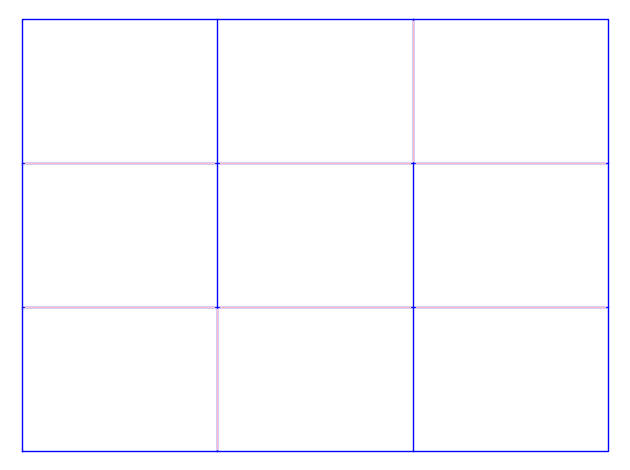

In [29]:
space = espace(3, 3)
cut(space, (1, 1), (2, 1))
cut(space, (1, 2), (2, 2))
cut(space, (2, 2), (3, 2))
cut(space, (2, 3), (3, 3))
labyDrawF(space)

In [30]:
def enceinte2(x : int, y : int) :
    """dessine l'enceinte d'un labyrinthe de taille x*y"""

    if x <= 0 or y <= 0 :
        raise ValueError("Les dimensions de l'enceintes doivent être strictement positives !")
    
    liste_pos = [(0, 0), (x, 0), (x, y), (0, y), (0, 0)]
    plot = line2d(liste_pos, axes=False)
    for i in range(1, x) :
        plot += line2d([(i, 0), (i, y)], axes=False, color = "grey", alpha = 0.35)
    for j in range(1, y) :
        plot += line2d([(0, j), (x, j)], axes=False, color = "grey", alpha = 0.35)
    return plot

In [36]:
def labyDrawM(lab) : 
    """Dessine une enceinte puis les murs en construisant le dicitonnaire des murs par omission"""
    
    l = list(lab.keys())
    dim = l[len(l) - 1]
    dimx = dim[0]
    dimy = dim[1]

    #dessin de l'enceinte du labyrinthe + grille
    p = enceinte2(dimx, dimy)
    mur = espace(dimx, dimy)

    for case in mur : 
        coords = mur[case]
        for c in lab[case] :
            coords.remove(c)
        for voisin in coords :
            calcx = case[0] - voisin[0]
            calcy = case[1] - voisin[1]
            if calcx == 0 :
                if calcy == 1 :
                    p += line2d([(case[0], dimy + 1 - case[1]), (case[0] - 1, dimy + 1 - case[1])], axes=False)
                    #print(case, voisin)
            else :
                if calcx == -1 :
                    p += line2d([(case[0], dimy + 1 - case[1]), (case[0], dimy - case[1])], axes=False)
                    #print(case, voisin)
    return p

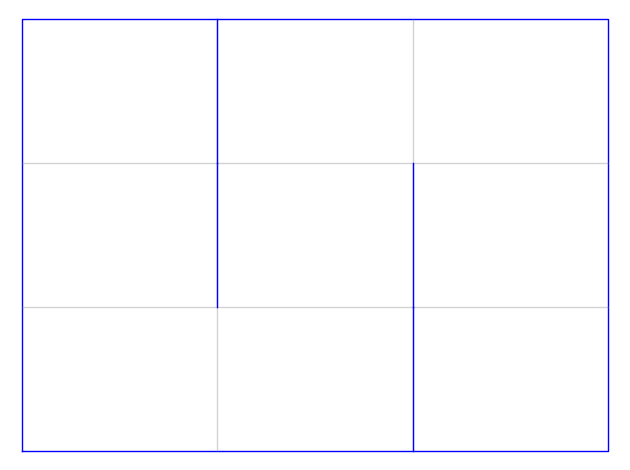

In [39]:
labyDrawM(space)

## Vérifier qu'une structure est un labyrinthe

In [62]:
def verifLaby(lab) :
    l = list(lab.keys())
    dim = l[len(l) - 1]
    dimx = dim[0]
    dimy = dim[1]

    spacetest = espace(dimx, dimy)
    occ = 0
    for el in spacetest:
        #print(spacetest[el])
        occ += len(spacetest[el])
    occ_cut = 0
    for el in lab:
        occ_cut += len(lab[el])
    truth_murs = (dimx*(dimy-1) - dimy + 1 == (occ - occ_cut)/2)
    return truth_murs and connexiTest(lab)

In [63]:
verifLaby(space)

True

# Idées et Test

In [16]:
spacetest = espace(4, 3)
print("spacetest début:", spacetest)
occ = 0
for el in spacetest:
    occ += len(spacetest[el])

cut(spacetest, (1, 2), (2, 2))
cut(spacetest, (1, 3), (2, 3))
cut(spacetest, (2, 1), (3, 1))
cut(spacetest, (2, 2), (3, 2))
cut(spacetest, (4, 1), (4, 2))
cut(spacetest, (4, 2), (4, 3))

print(connexiTest(spacetest))
print(spacetest)

occ_cut = 0
for el in spacetest:
    occ_cut += len(spacetest[el])
print(occ, occ_cut, (occ - occ_cut)/2)

#Conditions nécessaires et suffisantes caractérisation vrai labyrinthe
    #Connexe et bon nb de murs :)
truth_murs = (4*(3-1) - 3 + 1 == (occ - occ_cut)/2)
print(truth_murs and connexiTest(spacetest))



spacetest début: {(1, 1): [(2, 1), (1, 2)], (1, 2): [(2, 2), (1, 1), (1, 3)], (1, 3): [(2, 3), (1, 2)], (2, 1): [(1, 1), (3, 1), (2, 2)], (2, 2): [(1, 2), (3, 2), (2, 1), (2, 3)], (2, 3): [(1, 3), (3, 3), (2, 2)], (3, 1): [(2, 1), (4, 1), (3, 2)], (3, 2): [(2, 2), (4, 2), (3, 1), (3, 3)], (3, 3): [(2, 3), (4, 3), (3, 2)], (4, 1): [(3, 1), (4, 2)], (4, 2): [(3, 2), (4, 1), (4, 3)], (4, 3): [(3, 3), (4, 2)]}
True
{(1, 1): [(2, 1), (1, 2)], (1, 2): [(1, 1), (1, 3)], (1, 3): [(1, 2)], (2, 1): [(1, 1), (2, 2)], (2, 2): [(2, 1), (2, 3)], (2, 3): [(3, 3), (2, 2)], (3, 1): [(4, 1), (3, 2)], (3, 2): [(4, 2), (3, 1), (3, 3)], (3, 3): [(2, 3), (4, 3), (3, 2)], (4, 1): [(3, 1)], (4, 2): [(3, 2)], (4, 3): [(3, 3)]}
34 22 6
True
